# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Ahmed Elwassif

ID: 52-0267

Tutorial: T02

---



## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [ ]:
#Import el dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df.head(10)

<ipython-input-1-e716a346c59e>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
5,2014,Kia,Optima,LX,sedan,automatic,5xxgm4a70eg329048,co,4.6,8386.0mi,black,gray,"kia motors america, inc",$15100,$15500,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)
6,2007,Chevrolet,Avalanche,LS,Crew Cab,automatic,3gnfk12387g117727,wa,3.6,100676.0mi,gray,black,lexus of tacoma at fife,$13900,$13600,Wed Jan 21 2015 05:20:00 GMT-0800 (PST)
7,2008,Cadillac,CTS,Base,Sedan,automatic,1g6dv57v180180380,ca,4.6,87860.0mi,white,beige,aaero sweet company,$10950,$14700,Wed Jan 14 2015 04:15:00 GMT-0800 (PST)
8,2011,Mercedes-Benz,E-Class,E350,Sedan,automatic,wddhf5gb6ba419589,il,1.7,27819.0mi,gray,black,wells fargo dealer services,$26600,$20000,Thu Jan 15 2015 02:00:00 GMT-0800 (PST)
9,2014,Kia,Forte,LX,Sedan,automatic,knafx4a60e5219872,nv,4.9,4046.0mi,blue,gray,"kia motors america, inc",$12900,$13600,Fri Mar 06 2015 04:00:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
df.describe()

,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


In [ ]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [ ]:
df["body"].unique()

array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
#di method aw function 3ashan a reduce el categories
def reduce_body_categories(body):
    body_mapping = {
        'sedan': 'Sedan',
        'suv': 'SUV',
        'e-series van': 'Minivan',
        'crew cab': 'Pickup Truck',
        'double cab': 'Pickup Truck',
        'wagon': 'Wagon',
        'coupe': 'Coupe',
        'convertible': 'Convertible',
        'extended cab': 'Pickup Truck',
        'hatchback': 'Hatchback',
        'van': 'Minivan',
        'supercrew': 'Pickup Truck',
        'g sedan': 'Sedan',
        'king cab': 'Pickup Truck',
        'g convertible': 'Convertible',
        'quad cab': 'Pickup Truck',
        'supercab': 'Pickup Truck',
        'beetle convertible': 'Convertible',
        'minivan': 'Minivan',
        'g coupe': 'Coupe',
        'club cab': 'Pickup Truck',
        'access cab': 'Pickup Truck',
        'genesis coupe': 'Coupe',
        'promaster cargo van': 'Minivan',
        'mega cab': 'Pickup Truck',
        'koup': 'Coupe',
        'regular cab': 'Pickup Truck',
        'q60 convertible': 'Convertible',
        'elantra coupe': 'Coupe',
        'regular-cab': 'Pickup Truck',
        'promaster cargo van': 'Minivan',
        'xtracab': 'Pickup Truck',
        'cts coupe': 'Coupe',
        'cts wagon': 'Wagon',
        'granturismo convertible': 'Convertible',
        'tsx sport wagon': 'Wagon',
        'cts-v coupe': 'Coupe',
        'q60 coupe': 'Coupe',
        'granturismo convertible': 'Convertible',
        'transit van': 'Minivan',
        'tsx sport wagon': 'Wagon',
        'gran turismo convertible': 'Convertible',
        'cts coupe': 'Coupe',
        'CrewMax Cab': 'Pickup Truck',
        'crewmax cab': 'Pickup Truck',
        'Cab Plus 4': 'Pickup Truck',
        'gran turismo convertible': 'Convertible',
        'Transit Van': 'Minivan'
    }

    def map_body(body):
        for key, value in body_mapping.items():
            if key.lower() in body.lower():
                return value
        return body

    return body.apply(map_body)



#call body categories methods
df['body'] = reduce_body_categories(df['body'])
#capitalize data inside columns
df['interior'] = df['interior'].str.capitalize()
df['transmission'] = df['transmission'].str.capitalize()
df['color'] = df['color'].str.capitalize()
#ba change to type  float or int since they were objects
df['odometer'] = df['odometer'].str.replace('[^\d]', '', regex=True).astype(float)
df['sellingprice'] = df['sellingprice'].str.replace('[^\d]', '', regex=True).astype(int)
df['mmr'] = df['mmr'].str.replace('[^\d]', '', regex=True).astype(int)

#change null vaues in color and interior by getting the mode
df['color'] = df['color'].replace('—', None)
modeVal = df['color'].mode()[0]
df['color'].fillna(modeVal, inplace=True)
df['interior'] = df['interior'].replace('—', None)
modeVal_interior = df['interior'].mode()[0]
df['interior'].fillna(modeVal_interior, inplace=True)

#remove unwanted columns
df=df.drop('seller',axis=1)
df=df.drop('saledate',axis=1)
df=df.drop('vin',axis=1)
df=df.drop('state',axis=1)
df=df.drop('mmr',axis=1)


#renaming the columns to be more logical and capitalizing the words
df.rename(columns={'odometer': 'Odometer(mi)'}, inplace=True)
df.rename(columns={'sellingprice': 'SellingPrice'}, inplace=True)
df.rename(columns={'make': 'Make'}, inplace=True)
df.rename(columns={'model': 'Model'}, inplace=True)
df.rename(columns={'trim': 'Trim'}, inplace=True)
df.rename(columns={'body': 'Body'}, inplace=True)
df.rename(columns={'transmission': 'Transmission'}, inplace=True)
df.rename(columns={'condition': 'Condition'}, inplace=True)
df.rename(columns={'color': 'Color'}, inplace=True)
df.rename(columns={'interior': 'Interior'}, inplace=True)
df.rename(columns={'year': 'Year'}, inplace=True)


#display first 10 rows of dataset
df.head(10)






,Year,Make,Model,Trim,Body,Transmission,Condition,Odometer(mi),Color,Interior,SellingPrice
0,2013,Hyundai,Sonata,GLS,Sedan,Automatic,3.9,504040.0,Black,Gray,10900
1,2014,Toyota,4Runner,SR5,SUV,Automatic,4.9,178460.0,Gray,Black,29900
2,2012,Lexus,IS 250,Base,Sedan,Automatic,4.1,211220.0,Silver,Black,24200
3,2002,BMW,X5,4.4i,SUV,Automatic,1.9,1453030.0,Black,Black,3200
4,2014,Ford,E-Series Van,E-250,Minivan,Automatic,4.9,67140.0,White,Gray,22100
5,2014,Kia,Optima,LX,Sedan,Automatic,4.6,83860.0,Black,Gray,15500
6,2007,Chevrolet,Avalanche,LS,Pickup Truck,Automatic,3.6,1006760.0,Gray,Black,13600
7,2008,Cadillac,CTS,Base,Sedan,Automatic,4.6,878600.0,White,Beige,14700
8,2011,Mercedes-Benz,E-Class,E350,Sedan,Automatic,1.7,278190.0,Gray,Black,20000
9,2014,Kia,Forte,LX,Sedan,Automatic,4.9,40460.0,Blue,Gray,13600


After conducting correlation matrix near end of the document, we deicded to drop Seller, Saledate, State and VIN.The columns that we believed to have a relative Correlation with the dependent variable aka the selling price were kept.

To add, the state where the location car was at or where the location it was sold in did not affect the correlation between the condition of the car and its price and the milage of the car and its price did not affect either so we dropped the columns that it did not add value to us or we thought that it was irrelevant.

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='Color', ylabel='count'>

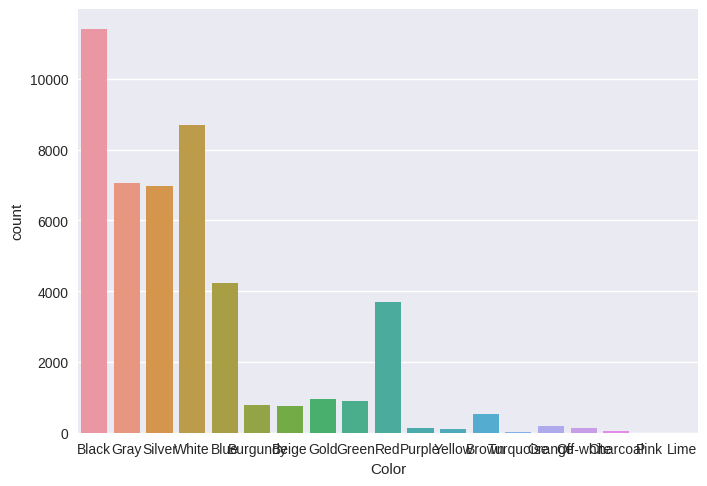

In [ ]:
# Basic, minimal plot example
sns.countplot(x='Color', data=df)

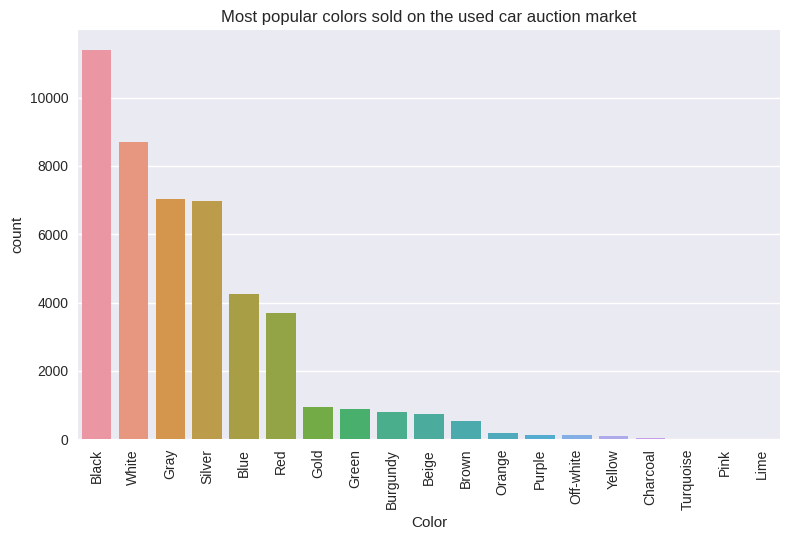

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('Color').size().sort_values(ascending=False)
sns.countplot(x='Color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

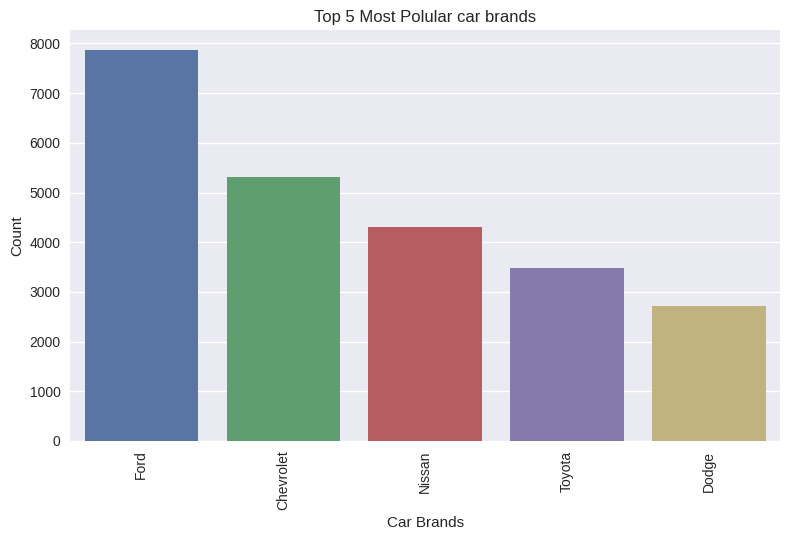

In [ ]:
# arrange the plot from ascending to descending
large_to_small = df['Make'].value_counts().sort_values(ascending=False)
#take first five
top_5_makes = large_to_small.head(5)
df_top_5_makes = df[df['Make'].isin(top_5_makes.index)]
# count plot and setting the title of the graph
sns.countplot(x='Make', data=df_top_5_makes, order=top_5_makes.index).set(title='Top 5 Most Polular car brands')
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Car Brands')
plt.ylabel('Count')
plt.show()


As obviously shown in the graph, Ford is the most popular brand amd then follows it Chevorlet and then Nissan.

**Q2: Draw a bar plot showing the selling price of each of the transmission categories. Do automatic cars, on
average (mean), sell for a higher price than manual cars?**

(Use the following link for reference:
https://seaborn.pydata.org/generated/seaborn.barplot.html)


**Visualization**

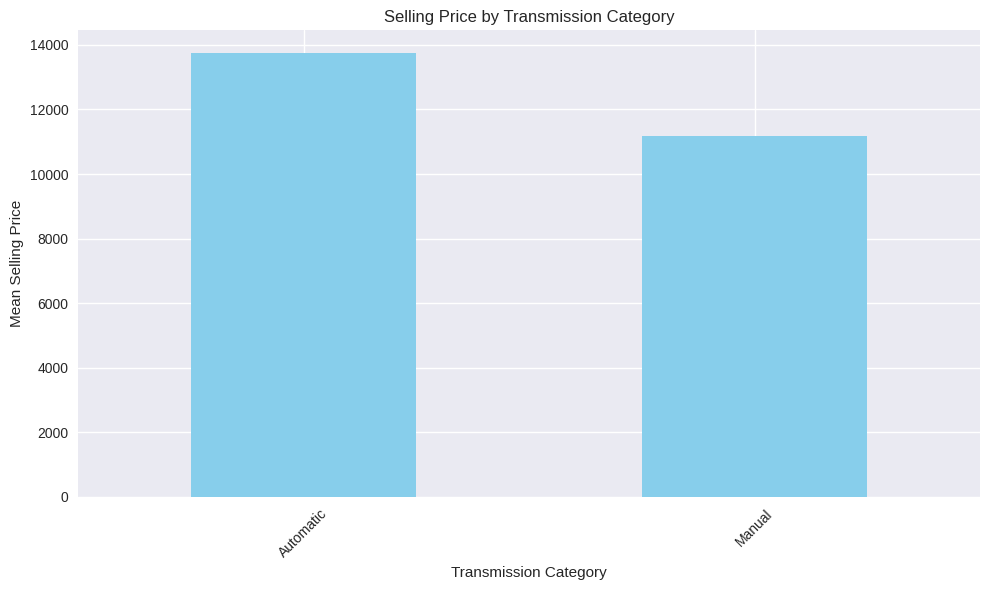

In [ ]:

#we have arranged the selling price of the Transmission based on the mean
transmission_prices = df.groupby('Transmission')['SellingPrice'].mean()
#Here we Plot the transmission selling price by using a bar chart
transmission_prices.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Selling Price by Transmission Category')
plt.xlabel('Transmission Category')
plt.ylabel('Mean Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()












**Answer for Q2**: Yes, Automatic cars, which is represented as 0, sell for a mean higher price than manual cars, which is indicated as 1.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

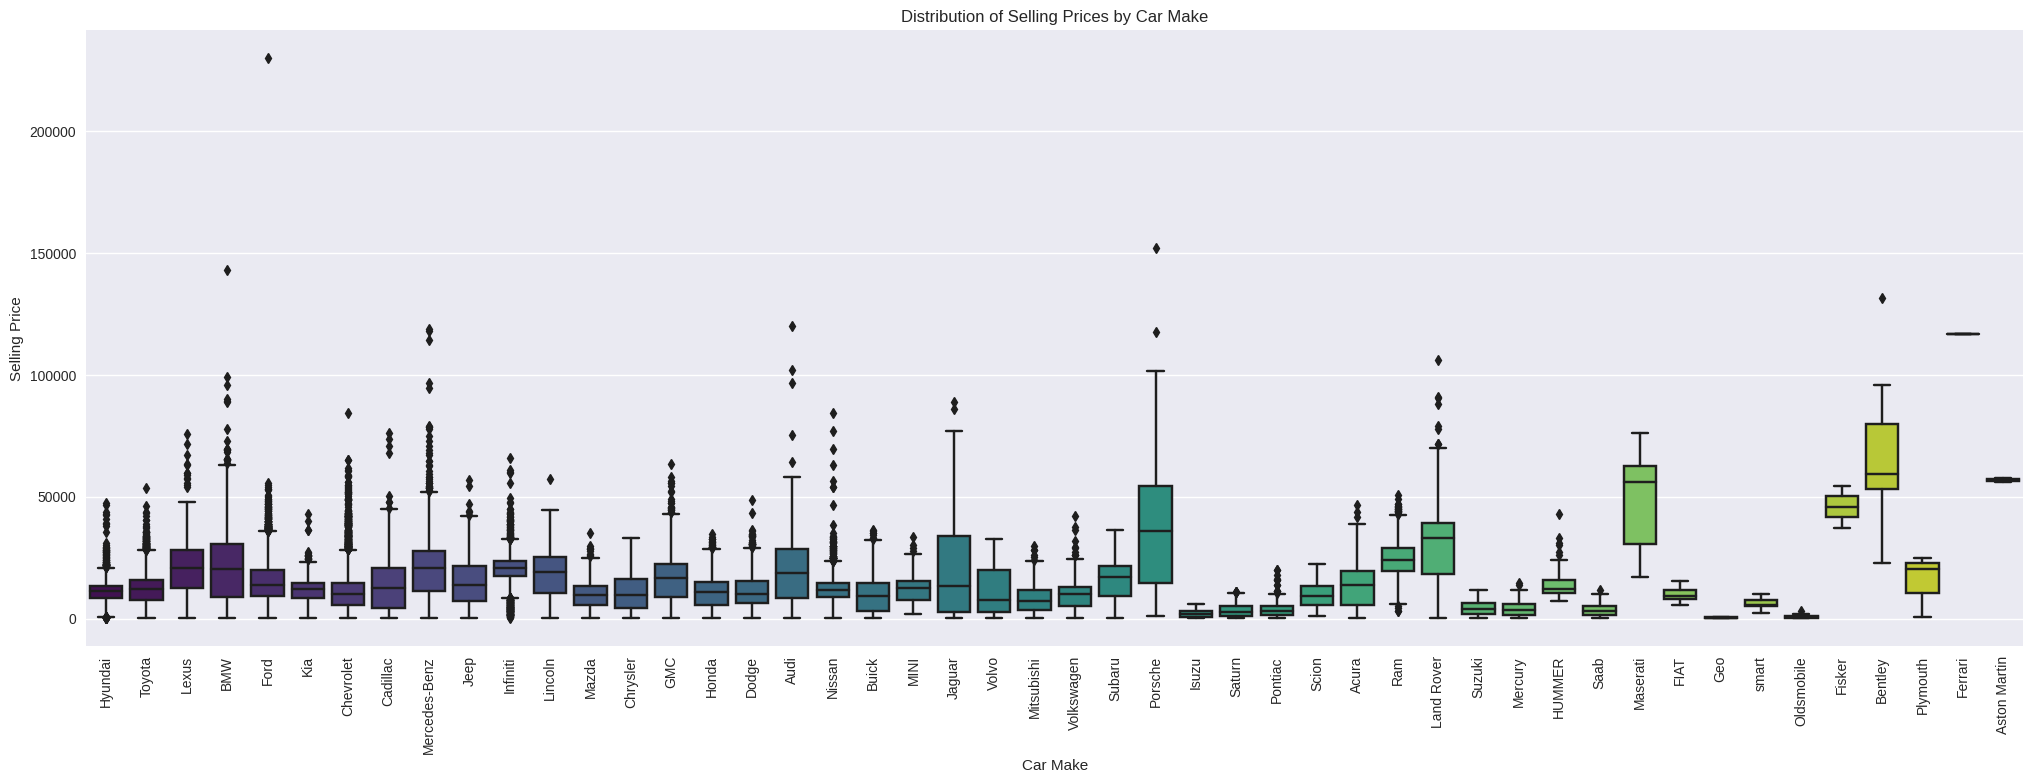

In [ ]:
#Here, the side of the graph is important in order to show all the car brands accurately
plt.figure(figsize=(25, 8))
sns.boxplot(data=df, x='Make', y='SellingPrice', palette='viridis')
plt.title('Distribution of Selling Prices by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)

plt.show()


Porche and Bentley are the most expensive while Porche and Bentley are the most or widest distrubuted in terms of selling price.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

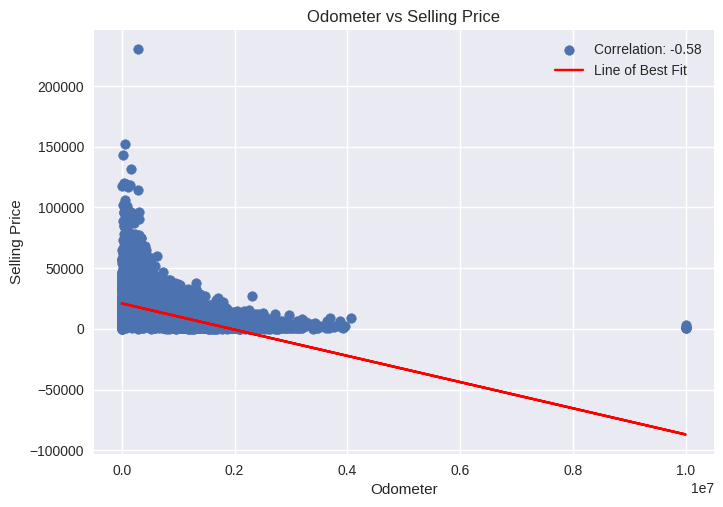

In [ ]:

# Calculate the correlation between mileage and selling price
correlation = df['Odometer(mi)'].corr(df['SellingPrice'])

# Perform linear regression to find the line of best fit
coefficients = np.polyfit(df['Odometer(mi)'], df['SellingPrice'], 1)
poly = np.poly1d(coefficients)
x = df['Odometer(mi)']
y = poly(x)

# Plot the data points and the line of best fit
plt.scatter(df['Odometer(mi)'], df['SellingPrice'], label=f'Correlation: {correlation:.2f}')
plt.plot(x, y, color='red', label='Line of Best Fit')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.title('Odometer vs Selling Price')
plt.legend()
plt.show()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df = df.set_index('year')
df['body'] = df['body'].str.capitalize()
df['interior'] = df['interior'].str.capitalize()
df['color'] = df['color'].str.capitalize()
df['transmission'] = df['transmission'].str.capitalize()
df['seller'] = df['seller'].str.title()

# Convert 'mileage' and 'sellingprice' columns to numeric
df['odometer'] = df['mileage'].str.replace('[^\d]', '', regex=True).astype(int)
df['sellingprice'] = df['sellingprice'].str.replace('[^\d]', '', regex=True).astype(int)

# Calculate the correlation between mileage and selling price
correlation = df['mileage'].corr(df['sellingprice'])

# Perform linear regression to find the line of best fit
coefficients = np.polyfit(df['mileage'], df['sellingprice'], 1)
poly = np.poly1d(coefficients)
x = df['mileage']
y = poly(x)

# Plot the data points and the line of best fit
plt.scatter(df['mileage'], df['sellingprice'], label=f'Correlation: {correlation:.2f}')
plt.plot(x, y, color='red', label='Line of Best Fit')
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.title('Mileage vs Selling Price')
plt.legend()
plt.show()

**Answer for Q4**: The line of best fit graph shows that there is a negative Correlation between the Milage and the Selling Price. This implies that as one goes down, the other goes up; in this instance, the car's selling price goes down the greater the odometer mileage.
Although not very strong, a correlation value of -0.58 is regarded as high. It implies that although the variables have a definite negative association, the correlation is not perfect.


**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

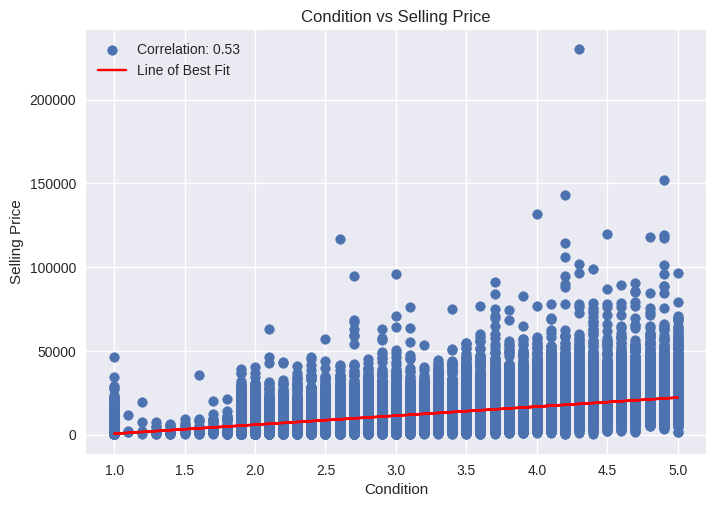

In [ ]:

#Caluculate el correlation between the condition and selling price
correlation = df['Condition'].corr(df['SellingPrice'])


# hena han perform linear regression to find the line of best fit
coefficients = np.polyfit(df['Condition'], df['SellingPrice'], 1)
poly = np.poly1d(coefficients)
x = df['Condition']
y = poly(x)

# Plot the data points and the line of best fit
plt.scatter(df['Condition'], df['SellingPrice'], label=f'Correlation: {correlation:.2f}')
plt.plot(x, y, color='red', label='Line of Best Fit')
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.title('Condition vs Selling Price')
plt.legend()
plt.show()



 The car's condition and the selling price, as shown by the line of best fit graph, have a positive correlation that is closer to 1 than to 0, which suggests that the two variables have a reasonably strong linear relationship. as two variables are positively correlated, it indicates that as one grows, the other does too. In this instance, the selling price of the automobile rises as its condition improves.Although not extremely strong, there is a strong correlation (Perfect).


**Q6: Draw a bar plot showing the selling price of each of the body categories. Are there differences in the average
(mean of) car price due to the car’s body type? If so, rank their order and state the most expensive and least
expensive car body type.**

**Visualization**

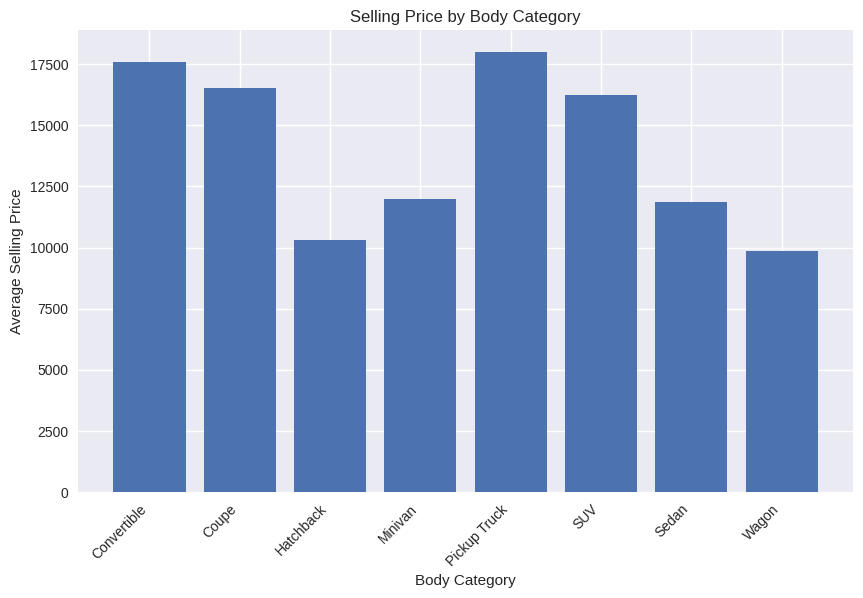

In [ ]:

# Group the data by 'body' and calculate the mean selling price for each category
body_category_mean = df.groupby('Body')['SellingPrice'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.bar(body_category_mean['Body'], body_category_mean['SellingPrice'])
plt.xlabel('Body Category')
plt.ylabel('Average Selling Price')
plt.title('Selling Price by Body Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # 'ha' specifies horizontal alignment

plt.show()

Yes, there are differences in the average selling prices of the body category. The most expensive car type is Pickup Truch and the least expensive is Wagon.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
df=df.drop('Interior',axis=1)
df=df.drop('Color',axis=1)



We dont beleive that Interior or colour would be any relavant now in our model

In [ ]:

categorical_columns = ['Make', 'Model','Body','Transmission','Trim']
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')


We encocded the catergorical columns

In [ ]:
df_encode.head()

,Year,Condition,Odometer(mi),SellingPrice,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,...,Trim_sDrive35is,Trim_t Turbo,Trim_x,Trim_xDrive28i,Trim_xDrive30i,Trim_xDrive35d,Trim_xDrive35i,Trim_xDrive35i Premium,Trim_xDrive48i,Trim_xDrive50i
0,2013,3.9,504040.0,10900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,4.9,178460.0,29900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,4.1,211220.0,24200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2002,1.9,1453030.0,3200,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,67140.0,22100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
numerical_columns = ['Year', 'Condition', 'Odometer(mi)']


df_encode[numerical_columns] = (

    df_encode[numerical_columns] - df_encode[numerical_columns].min()

) /(

    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)


df_encode.head()

,Year,Condition,Odometer(mi),SellingPrice,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,...,Trim_sDrive35is,Trim_t Turbo,Trim_x,Trim_xDrive28i,Trim_xDrive30i,Trim_xDrive35d,Trim_xDrive35i,Trim_xDrive35i Premium,Trim_xDrive48i,Trim_xDrive50i
0,0.92,0.725,0.050403,10900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.96,0.975,0.017845,29900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.88,0.775,0.021121,24200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.48,0.225,0.145302,3200,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.96,0.975,0.006713,22100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,Year,Make,Model,Trim,Body,Transmission,Condition,Odometer(mi),SellingPrice
0,2013,Hyundai,Sonata,GLS,Sedan,Automatic,3.9,504040.0,10900
1,2014,Toyota,4Runner,SR5,SUV,Automatic,4.9,178460.0,29900
2,2012,Lexus,IS 250,Base,Sedan,Automatic,4.1,211220.0,24200
3,2002,BMW,X5,4.4i,SUV,Automatic,1.9,1453030.0,3200
4,2014,Ford,E-Series Van,E-250,Minivan,Automatic,4.9,67140.0,22100


## Modelling

_Apply the linear regression model below._

We just made the systematic steps below in order to generate a regression model and output the R2 and root mean of square

In [ ]:
from sklearn.model_selection import train_test_split

x = df_encode.drop('SellingPrice',axis=1) # Independent variable
y = df_encode['SellingPrice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [ ]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,2716.606539
1,theta_1,Year,25436.864244
2,theta_2,Condition,5113.501955
3,theta_3,Odometer(mi),-44246.373996
4,theta_4,Make_Aston Martin,18648.419482
...,...,...,...
1797,theta_1797,Trim_xDrive35d,3394.853103
1798,theta_1798,Trim_xDrive35i,6211.575780
1799,theta_1799,Trim_xDrive35i Premium,5552.685105
1800,theta_1800,Trim_xDrive48i,-1362.924238


## Model Evaluation

We believed that the models we ran were fairly accurate since, on one glance of it, it is logical that an automobile would cost more to repair and that its value would decrease the more miles it has been driven. The numbers and the we generated above both matched our theory, so when we examined the data, it confirmed what we had expected.


In [ ]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  3554.5467330771385
R^2 obtained is: 0.8632440634969994


## Conclusion and Recommendations

Comment on the model accuracy, and thoroughly explain its value, as well as your findings from the model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.

After making the linear regression model, we have obtained an R^2 of 0.86. It is between 0 and 1. From our point of view, We think that the model is not overfitting and is not underfitting, It is just right  since our R^2 is between 0 and 1. We would reccomend this model for used car dealerships that want to get reliable estimates for used car prices as our model is just right model . It is not not underfitted and also, It is not overfitted.